In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score


In [9]:
plt.style.use("seaborn-v0_8")

In [10]:
df = pd.read_csv("creditcard.csv")
df.head()
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
X = df.drop("Class", axis=1)
y = df["Class"]
y.value_counts()


,count
Class,
0,284315
1,492


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


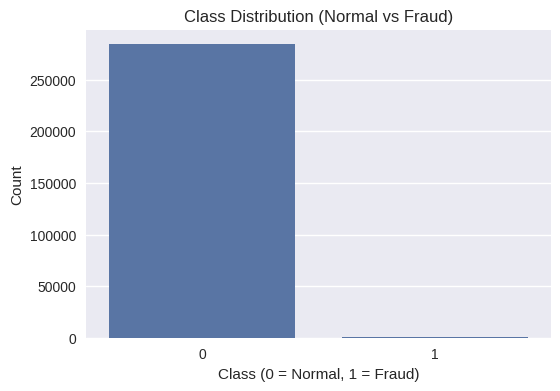

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class Distribution (Normal vs Fraud)")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


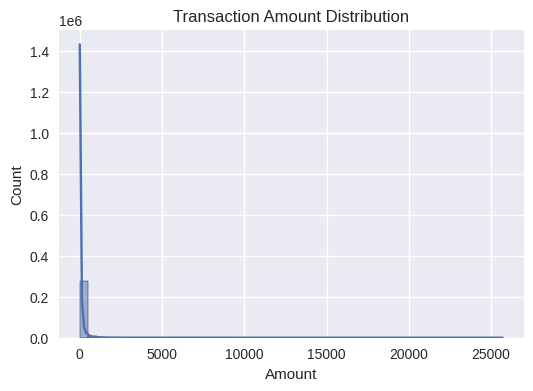

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


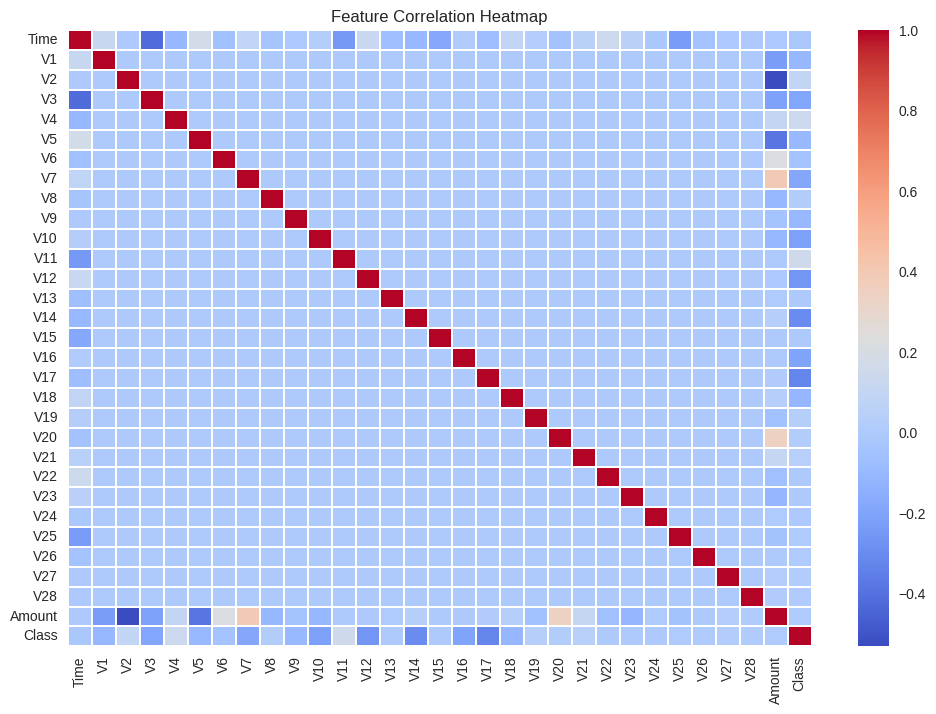

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.1)
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)


In [14]:
pca.explained_variance_ratio_


array([0.06527521, 0.05612313])

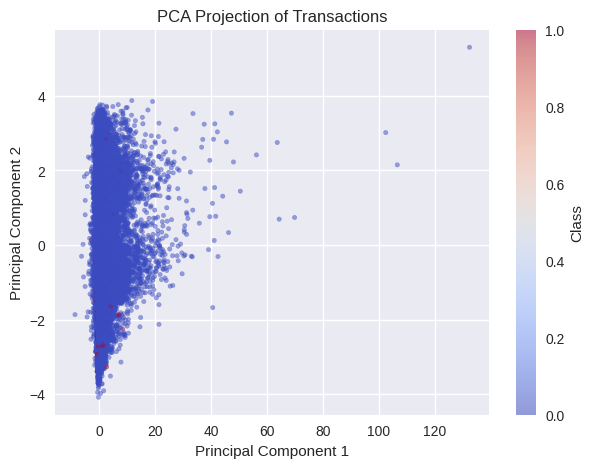

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap="coolwarm",
    alpha=0.5,
    s=10
)
plt.title("PCA Projection of Transactions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()


In [16]:
X_train = X_scaled[y == 0]
X_train.shape

(284315, 30)

In [17]:
np.save("X_scaled.npy", X_scaled)
np.save("X_train.npy", X_train)
np.save("y_true.npy", y.values)


Isolation forest

In [18]:
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.0017,  # matches fraud ratio (~492 / 284807)
    random_state=42,
    n_jobs=-1
)


In [19]:
iso_forest.fit(X_train)


IsolationForest(contamination=0.0017, n_jobs=-1, random_state=42)

In [21]:
anomaly_scores = iso_forest.decision_function(X_scaled)
anomaly_scores.shape

(284807,)

In [22]:
y_pred = iso_forest.predict(X_scaled)
y_pred_binary = np.where(y_pred == -1, 1, 0)


In [23]:
pd.Series(y_pred_binary).value_counts()


,count
0,284197
1,610


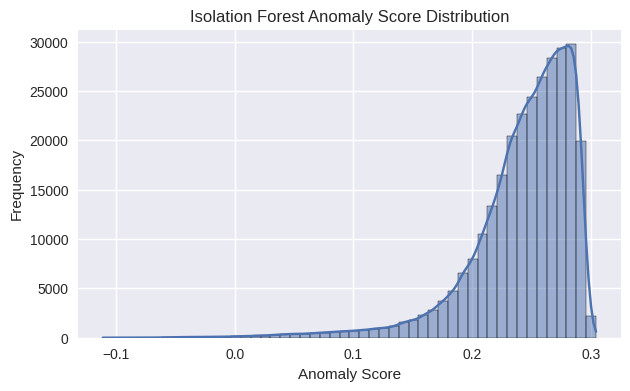

In [24]:
plt.figure(figsize=(7,4))
sns.histplot(anomaly_scores, bins=50, kde=True)
plt.title("Isolation Forest Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()


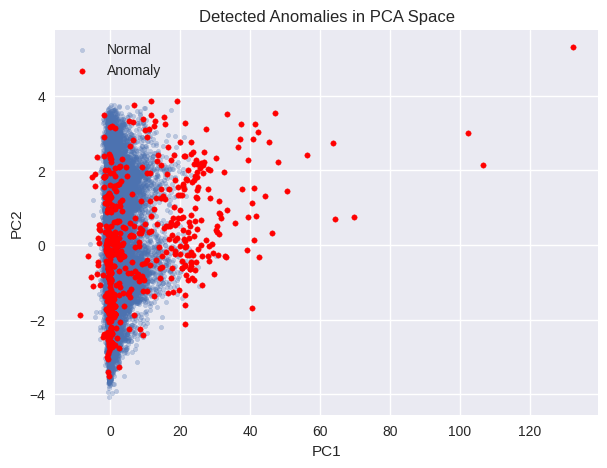

In [25]:
plt.figure(figsize=(7,5))

plt.scatter(
    X_pca[y_pred_binary == 0, 0],
    X_pca[y_pred_binary == 0, 1],
    label="Normal",
    alpha=0.3,
    s=10
)

plt.scatter(
    X_pca[y_pred_binary == 1, 0],
    X_pca[y_pred_binary == 1, 1],
    label="Anomaly",
    c="red",
    s=15
)

plt.legend()
plt.title("Detected Anomalies in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [26]:
import joblib

joblib.dump(iso_forest, "isolation_forest_model.pkl")
np.save("anomaly_scores.npy", anomaly_scores)
np.save("y_pred_binary.npy", y_pred_binary)


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred_binary)
cm


array([[283831,    484],
       [   366,    126]])

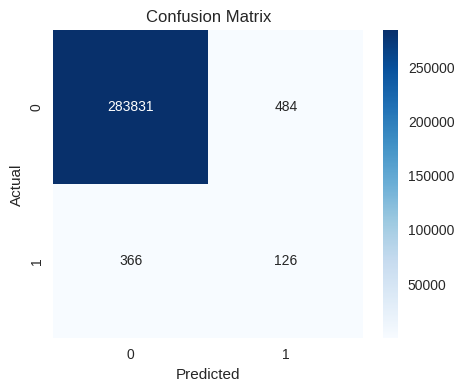

In [28]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred_binary, digits=4))


              precision    recall  f1-score   support

           0     0.9987    0.9983    0.9985    284315
           1     0.2066    0.2561    0.2287       492

    accuracy                         0.9970    284807
   macro avg     0.6026    0.6272    0.6136    284807
weighted avg     0.9973    0.9970    0.9972    284807



In [30]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y, -anomaly_scores)
roc_auc


np.float64(0.9480181148557173)

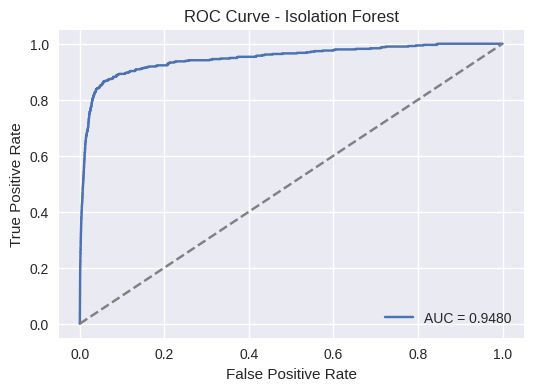

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, -anomaly_scores)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Isolation Forest")
plt.legend()
plt.show()


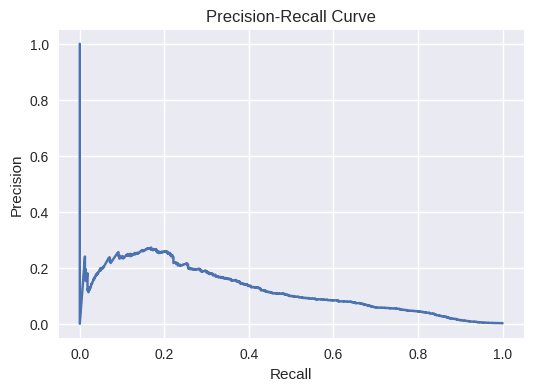

In [32]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y, -anomaly_scores)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [33]:
thresholds = np.percentile(anomaly_scores, [1, 2, 3, 4, 5])

for t in thresholds:
    preds = (anomaly_scores <= t).astype(int)
    print(f"Threshold {t:.4f}")
    print(classification_report(y, preds, digits=4))


Threshold 0.0662
              precision    recall  f1-score   support

           0     0.9992    0.9909    0.9950    284315
           1     0.0920    0.5325    0.1568       492

    accuracy                         0.9901    284807
   macro avg     0.5456    0.7617    0.5759    284807
weighted avg     0.9976    0.9901    0.9936    284807

Threshold 0.1057
              precision    recall  f1-score   support

           0     0.9995    0.9812    0.9902    284315
           1     0.0600    0.6951    0.1105       492

    accuracy                         0.9807    284807
   macro avg     0.5297    0.8381    0.5504    284807
weighted avg     0.9978    0.9807    0.9887    284807

Threshold 0.1318
              precision    recall  f1-score   support

           0     0.9996    0.9713    0.9853    284315
           1     0.0455    0.7907    0.0861       492

    accuracy                         0.9710    284807
   macro avg     0.5226    0.8810    0.5357    284807
weighted avg     0.9980

Adv

In [11]:
df_log = df.copy()

df_log["Amount"] = np.log1p(df_log["Amount"])
X_log = df_log.drop("Class", axis=1)
y = df_log["Class"]
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)
X_log_train = X_log_scaled[y == 0]


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [13]:
input_dim = X_log_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)

decoded = Dense(16, activation="relu")(encoded)
output_layer = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer="adam", loss="mse")


In [14]:
history = autoencoder.fit(
    X_log_train,
    X_log_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9088 - val_loss: 0.6708
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6278 - val_loss: 0.5995
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5668 - val_loss: 0.5788
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5457 - val_loss: 0.5717
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5381 - val_loss: 0.5700
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5279 - val_loss: 0.5654
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5300 - val_loss: 0.5600
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5195 - val_loss: 0.5585
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5263 - val_loss: 0.5588
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5212 - val_loss: 0.5566


In [15]:
reconstructions = autoencoder.predict(X_log_scaled)
reconstruction_error = np.mean(
    np.square(X_log_scaled - reconstructions), axis=1
)


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [16]:
reconstruction_error_norm = (
    reconstruction_error - reconstruction_error.min()
) / (reconstruction_error.max() - reconstruction_error.min())


In [17]:
from sklearn.neighbors import LocalOutlierFactor


In [18]:
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.01,
    novelty=False
)


In [19]:
lof_pred = lof.fit_predict(X_log_scaled)
lof_scores = -lof.negative_outlier_factor_


In [20]:
lof_scores_norm = (
    lof_scores - lof_scores.min()
) / (lof_scores.max() - lof_scores.min())


In [21]:
iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.01,
    random_state=42,
    n_jobs=-1
)

iso_forest.fit(X_log_train)


IsolationForest(contamination=0.01, n_estimators=200, n_jobs=-1,
                random_state=42)

In [22]:
if_scores = -iso_forest.decision_function(X_log_scaled)


In [23]:
if_scores_norm = (
    if_scores - if_scores.min()
) / (if_scores.max() - if_scores.min())


In [24]:
ensemble_score = (
    0.4 * if_scores_norm +
    0.35 * reconstruction_error_norm +
    0.25 * lof_scores_norm
)


In [25]:
threshold = np.percentile(ensemble_score, 98)


In [26]:
y_pred_ensemble = (ensemble_score >= threshold).astype(int)


In [27]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y, y_pred_ensemble, digits=4))
roc_auc = roc_auc_score(y, ensemble_score)
roc_auc


              precision    recall  f1-score   support

           0     0.9995    0.9812    0.9903    284315
           1     0.0621    0.7195    0.1144       492

    accuracy                         0.9808    284807
   macro avg     0.5308    0.8504    0.5523    284807
weighted avg     0.9979    0.9808    0.9888    284807



np.float64(0.9492821642775983)

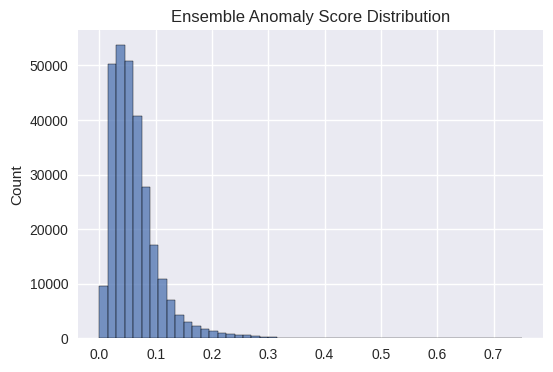

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(ensemble_score, bins=50)
plt.title("Ensemble Anomaly Score Distribution")
plt.show()
